In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#loading the csv data to pandas dataframe 
gold_data = pd.read_csv("gld_price_data2.csv")

In [4]:
#print 1st 5 rows of dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
2,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
3,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
4,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100


In [5]:
#last 5 data info
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2283,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2284,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2285,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2286,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2287,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#no of rows and cols
gold_data.shape

(2288, 6)

In [7]:
#getting basic info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2288 non-null   object 
 1   SPX      2288 non-null   float64
 2   GLD      2288 non-null   float64
 3   USO      2288 non-null   float64
 4   SLV      2288 non-null   float64
 5   EUR/USD  2288 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.4+ KB


In [8]:
#checking no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000
mean,1654.496857,122.765670,31.801506,20.089238,1.283487
std,519.302311,23.267061,19.483381,7.094214,0.131485
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.249969,109.755001,14.377500,15.570000,1.170642
50%,1551.849976,120.584999,33.865000,17.270000,1.303271
75%,2073.372558,132.855003,37.820000,22.917499,1.369690
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
#finding Corelation between datasets
gold_data['Date'] = pd.to_datetime(gold_data['Date'])  # Convert the column to a datetime object.

corelation = gold_data.corr()

<AxesSubplot:>

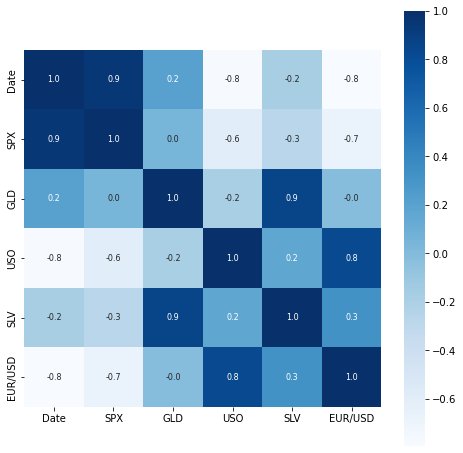

In [11]:
#constructing a heatmap for understanding corelation
plt.figure(figsize=(8,8))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
#corelation values 
print(corelation['GLD'])

Date       0.207173
SPX        0.048842
GLD        1.000000
USO       -0.183664
SLV        0.866830
EUR/USD   -0.022392
Name: GLD, dtype: float64


(array([ 55., 230., 155., 383., 738., 257.,  73., 209., 161.,  27.]),
 array([ 70.       ,  81.4589996,  92.9179992, 104.3769988, 115.8359984,
        127.294998 , 138.7539976, 150.2129972, 161.6719968, 173.1309964,
        184.589996 ]),
 <BarContainer object of 10 artists>)

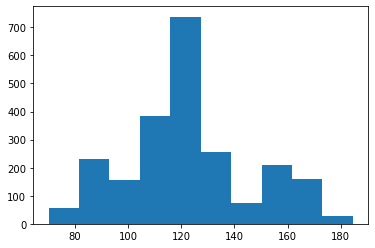

In [18]:
#checking the distribution of the gold price 
plt.hist(gold_data['GLD'])

In [20]:
#spliting the Features and Target

In [21]:
x = gold_data.drop(['Date','GLD'],axis = 1)
y = gold_data['GLD']

In [24]:
print(y)

0        85.129997
1        84.769997
2        86.779999
3        86.550003
4        88.250000
           ...    
2283    124.589996
2284    124.330002
2285    125.180000
2286    124.489998
2287    122.543800
Name: GLD, Length: 2288, dtype: float64


In [25]:
#spliting into tranning and testing data 
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
#model Tranning
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
#tranning the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [30]:
#model Evaluation 
#prediction on test data 
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.13150045  82.30220056 115.30929992 118.72209899 128.86240103
 152.81370188 151.68250166 126.14350078 108.5934004  125.96610088
 118.85100051 172.8389987  141.17970176 167.88659587 117.06160165
 116.68700061 140.05459859 171.80380012 159.71889968 169.86770086
 154.57659953 125.08419944 175.48309882 155.03750081 128.60800145
  94.88490109  83.41469945 119.14820078 117.33850084 168.87719555
  88.07299869 125.39120014  92.49760021 125.6388011  120.89579887
 137.56720045 114.7937998  110.70519905 152.3228997  115.73660058
 106.17030028  87.22359854 112.48769999 116.12619938 159.23550056
 119.11479933 104.09909986 106.99049965  89.83519911 119.58889974
  74.90280047 114.27339942 120.91559938 119.81930003 125.20940015
 121.65450008 153.50609808 169.62879947 147.59309852  86.37339865
  96.21310004  86.12290098  87.81279812 118.8633011  126.38820063
 130.06839808 167.96209915 113.13140134 117.76559877 106.38729977
 160.9015995  142.84089974 131.32860475 121.07100049 122.52649959
 119.56439

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error is " , error_score)

R squared error is  0.9882927221792085


In [33]:
#comparinng actual values with the predicted values
y_tes = list(Y_test)

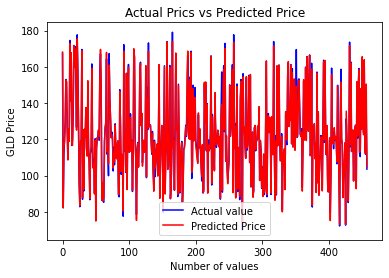

In [40]:
plt.plot(y_tes,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='red',label='Predicted Price')
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.title("Actual Prics vs Predicted Price")
plt.show()